<a href="https://colab.research.google.com/github/Cryslender/AI-Assignment-Transfer-Learning/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Neccessary Libraries to used

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Data Collection

In [ ]:
# read the dataset from tensorflow
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

# Data Pre-processing

##Training Dataset

In [ ]:
#split 80% of the dataset for training
img_height,img_width=75,75
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode="categorical",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


##Validation Dataset

In [ ]:
#split 20% of the dataset for validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode="categorical",
  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


##Dataset Sample

In [ ]:
# print the class names
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


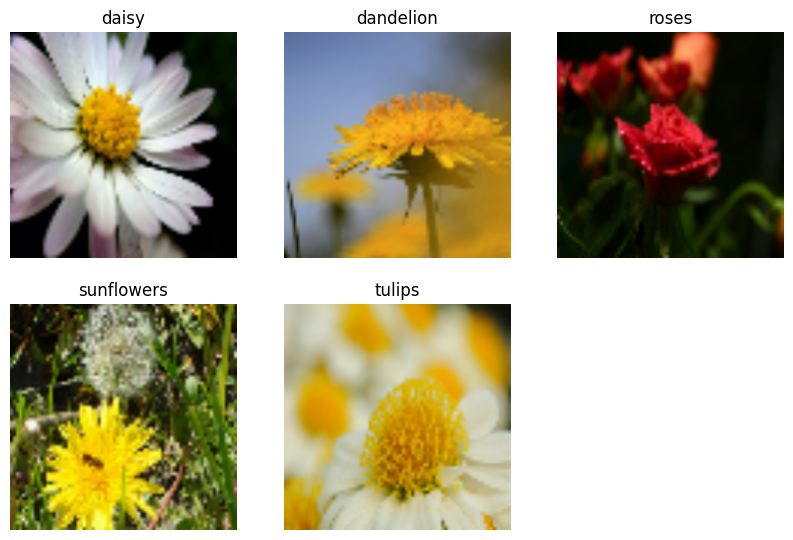

In [ ]:
#show sample of images dataset
import matplotlib.pyplot as plt

target_size = (224, 224)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6-1):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.image.resize(images[i], target_size).numpy().astype("uint8"))
    plt.title(class_names[i])
    plt.axis("off")

# Model Design ResNet50 with ANN

In [ ]:
#initialize an empty sequatial model
resnet_model = Sequential()

#import base model
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(75,75,3),
                   pooling='avg',classes=5,
                   weights='imagenet')

#freeze all the layers of the base model to avoid overriding the its knowledge
for layer in pretrained_model.layers:
        layer.trainable=False

#add base model as the first layer to sequatial model followed by other layers and output layer
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

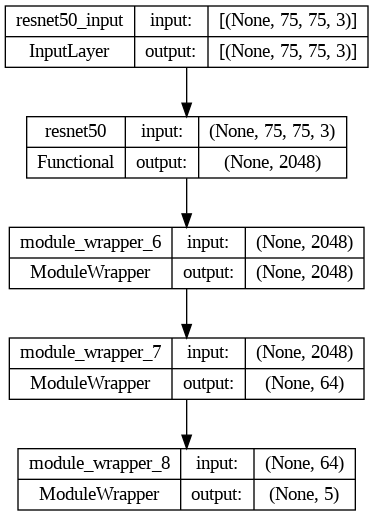

In [ ]:
from tensorflow.keras.utils import plot_model
# Generate a visualization of the model
plot_model(resnet_model, to_file='transferLearning.png', show_shapes=True, show_layer_names=True)

In [ ]:
#show the summary of the model
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_6 (ModuleWr  (None, 2048)              0         
 apper)                                                          
                                                                 
 module_wrapper_7 (ModuleWr  (None, 64)                131136    
 apper)                                                          
                                                                 
 module_wrapper_8 (ModuleWr  (None, 5)                 325       
 apper)                                                          
                                                                 
Total params: 23719173 (90.48 MB)
Trainable params: 131461 (513.52 KB)
Non-trainable params: 23587712 (89.98 MB)
_______

In [ ]:
#compile the model
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

##Model Training and Validation

In [ ]:
#fit the model to the training and validation dataset
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 109s 1s/step - loss: 0.9304 - accuracy: 0.6495 - val_loss: 0.6732 - val_accuracy: 0.7575
Epoch 2/10
92/92 [==============================] - 100s 1s/step - loss: 0.5636 - accuracy: 0.7980 - val_loss: 0.6419 - val_accuracy: 0.7616
Epoch 3/10
92/92 [==============================] - 102s 1s/step - loss: 0.4083 - accuracy: 0.8529 - val_loss: 0.6210 - val_accuracy: 0.7834
Epoch 4/10
92/92 [==============================] - 103s 1s/step - loss: 0.2965 - accuracy: 0.9033 - val_loss: 0.6309 - val_accuracy: 0.7902
Epoch 5/10
92/92 [==============================] - 103s 1s/step - loss: 0.2349 - accuracy: 0.9213 - val_loss: 0.6225 - val_accuracy: 0.7752
Epoch 6/10
92/92 [==============================] - 120s 1s/step - loss: 0.1655 - accuracy: 0.9523 - val_loss: 0.6239 - val_accuracy: 0.7929
Epoch 7/10
92/92 [==============================] - 100s 1s/step - loss: 0.1322 - accuracy: 0.9625 - val_loss: 0.6685 - val_accuracy: 0.7779
Epoch 8/10
92

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = resnet_model.evaluate(val_ds, verbose=2)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

23/23 - 19s - loss: 0.7083 - accuracy: 0.7943 - 19s/epoch - 822ms/step
Test accuracy: 79.43%


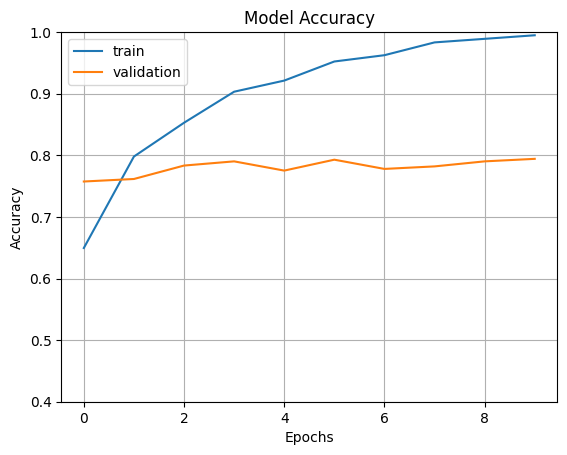

In [ ]:
#show model accuracy
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

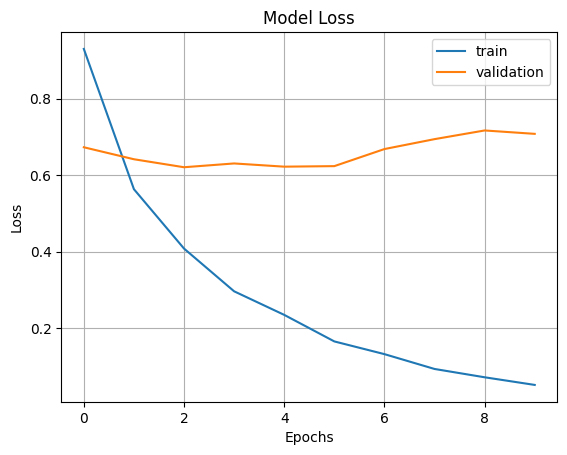

In [ ]:
#show model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

##Model Testing and Evaluation

###Label Testing

1/1 [==============================] - 1s 736ms/step


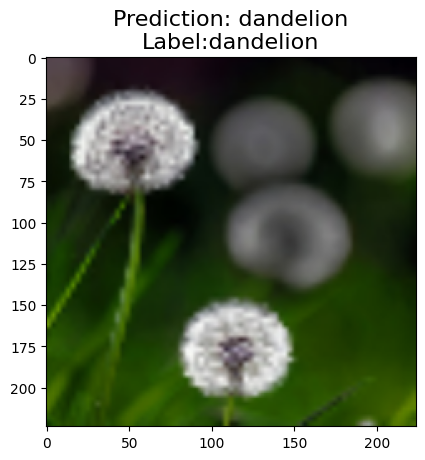

In [ ]:
#randomly find the index of image number to predict
random_index = np.random.choice(len(val_ds))

#find the value to test using random index and find the true value
x_samples, y_sampleTrue = None, None  # Initialize variables
for i, (images, labels) in enumerate(val_ds):
    if i == random_index:
        x_samples = images
        y_sampleTrue = labels
        break
#test the model by predicting the flower image
y_predict = resnet_model.predict(x_samples)

#find the class where the image belong
y_sample_predClass = np.argmax(y_predict, axis=1)

# Find the predicted class index
predicted_class_index = y_sample_predClass[0]

# Find the true class index
true_class_index = np.argmax(y_sampleTrue, axis=1)[0]

# Get the predicted and true class names
predicted_class_name = class_names[predicted_class_index]
true_class_name = class_names[true_class_index]


plt.title("Prediction: {0}\nLabel:{1}".format(predicted_class_name, true_class_name), fontsize=16)
plt.imshow(tf.image.resize(x_samples[0], target_size).numpy().astype("uint8"))

plt.show()

###Evaluation Matrics

In [ ]:
#import the metrics
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score

y_true = np.argmax(y_sampleTrue, axis=1)  # True labels
y_pred = y_sample_predClass  # Predicted labels

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_true, y_pred,average='macro')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_true, y_pred,average='macro')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_true, y_pred,average='macro')
print("F1 Score:", f1)

Accuracy: 0.8333333333333334
Precision: 0.8420634920634921
Recall: 0.8114285714285714
F1 Score: 0.8172951231774761


###Confusuion Matrix

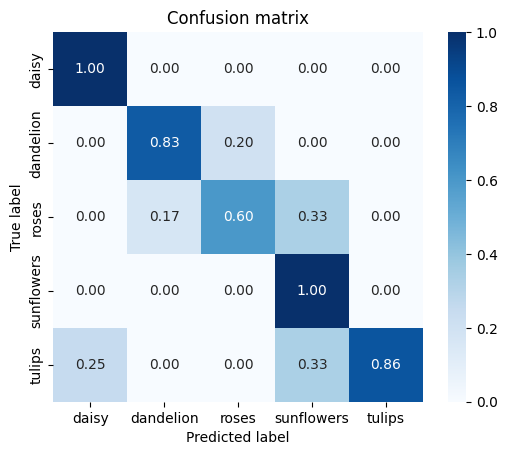

In [ ]:
import sklearn.metrics as sk_metrics
import seaborn as sns
def show_confusion_matrix(test_labels, predictions):
  #Compute confusion matrix and normalize.
  confusion = sk_metrics.confusion_matrix(
  np.argmax(test_labels, axis=1), predictions)
  confusion_normalized = confusion.astype("float") / confusion.sum(axis=1)
  axis_labels = class_names
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.2f', square=True)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

show_confusion_matrix(y_sampleTrue,y_sample_predClass)